In [1]:
from mpl_toolkits import mplot3d
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt


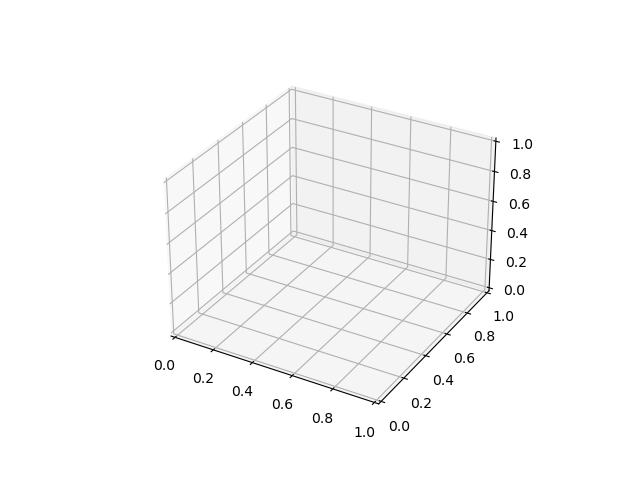

In [2]:
fig0 = plt.figure()
ax0 = plt.axes(projection = '3d')

In [3]:
zdata = 15 * np.random.random(100)
zdata

array([ 7.5729531 ,  5.04542013,  8.69469334,  1.66333892,  1.67434484,
        8.78413408,  9.13820567, 12.23278865,  0.31922852,  2.97078121,
        8.37393273,  2.96096372,  3.47560447, 14.47485743, 10.06309119,
        9.35289116,  1.34820491,  4.89025641,  4.03109129, 13.94112891,
        4.45584362, 13.38355616, 12.65379026, 13.383373  ,  4.85205217,
        7.9111616 ,  6.13017606, 12.4082615 ,  9.1641929 , 14.36395542,
        7.4385046 ,  7.58303224,  5.17362044, 14.33179554,  7.72324259,
       11.18051645,  0.46875208,  8.70746519,  7.02769987,  2.0501755 ,
       11.59831706,  0.72745135,  2.1518616 ,  2.81453341,  9.66746048,
        7.43052503,  0.93574139,  8.62698138,  5.95612065,  0.7657757 ,
       14.55658942,  1.26242593, 12.94737186,  0.79380796,  6.5558313 ,
        6.29308153, 11.74897623, 13.78047141,  5.64630091,  8.26752284,
        9.1325969 ,  6.9325597 ,  3.82691568, 13.73496512,  8.61258875,
        0.14521114, 11.58560968,  8.88981393, 11.4317429 ,  2.51

In [4]:
ax0 = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax0.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax0.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')

In [5]:
def f(x,y):
    return np.sin(np.sqrt(x**2 + y**2))

x= np.linspace(-6, 6, 30)
y= np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x,y)
Z = f(X,Y)

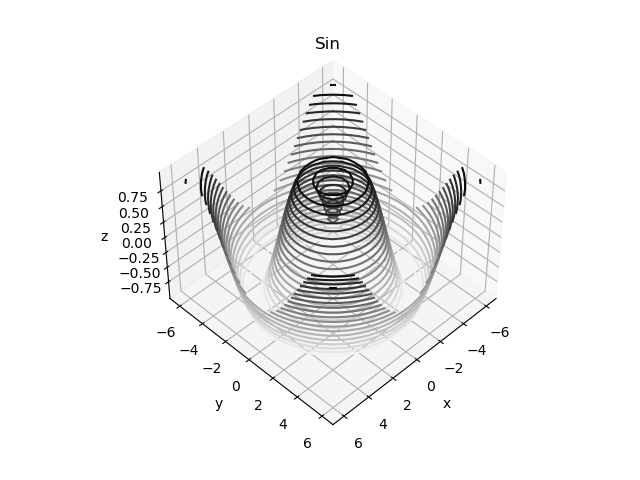

In [6]:
fig2  = plt.figure()
ax1 = plt.axes(projection = '3d')
ax1.contour3D(X,Y,Z,20,cmap='binary')
ax1.set_title('Sin')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.view_init(45,45)

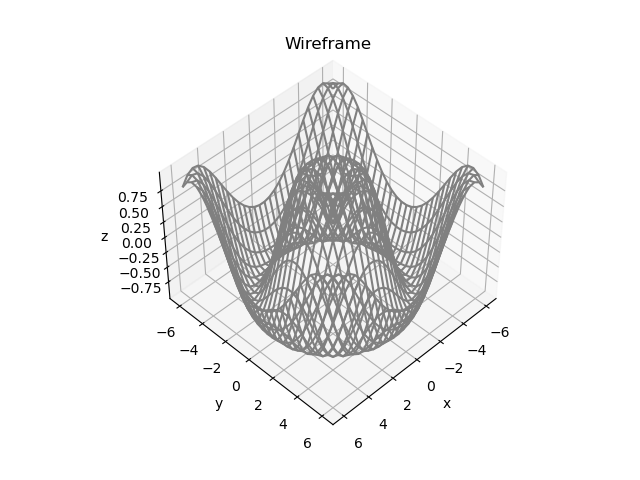

In [7]:
fig3  = plt.figure()
ax2 = plt.axes(projection = '3d')
ax2.plot_wireframe(X,Y,Z,color='grey')
ax2.set_title('Wireframe')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')
ax2.view_init(45,45)

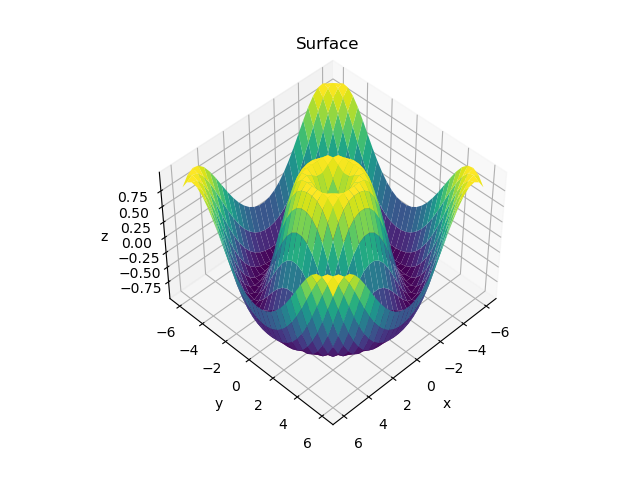

In [8]:
fig4  = plt.figure()
ax3 = plt.axes(projection = '3d')
ax3.plot_surface(X,Y,Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax3.set_title('Surface')
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_zlabel('z')
ax3.view_init(45,45)

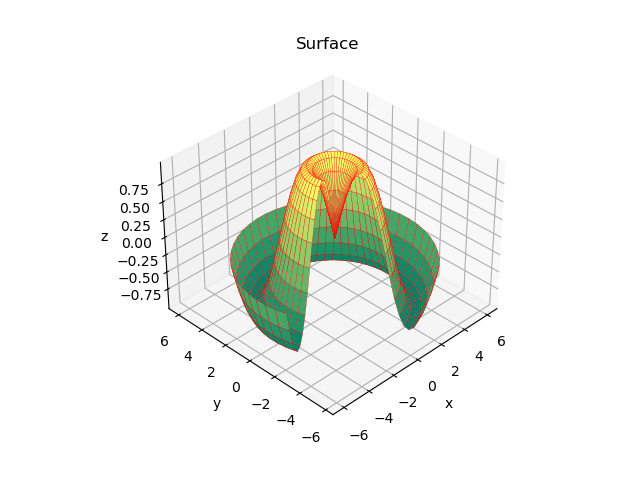

In [9]:
r = np.linspace(0, 6, 20)
theta = np.linspace(-0.6 * np.pi, 0.9 * np.pi, 40)
r, theta = np.meshgrid(r, theta)

X = r * np.sin(theta)
Y = r * np.cos(theta)
Z = f(X, Y)

fig5  = plt.figure()
ax4 = plt.axes(projection = '3d')
ax4.plot_surface(X,Y,Z, rstride=1, cstride=1, cmap='summer', linewidth=0.2, edgecolor='red')
ax4.set_title('Surface')
ax4.set_xlabel('x')
ax4.set_ylabel('y')
ax4.set_zlabel('z')
ax4.view_init(35,225)

## Example: Visualizing a Möbius strip
A Möbius strip is similar to a strip of paper glued into a loop with a half-twist. Topologically, it's quite interesting because despite appearances it has only a single side! Here we will visualize such an object using Matplotlib's three-dimensional tools. The key to creating the Möbius strip is to think about it's parametrization: it's a two-dimensional strip, so we need two intrinsic dimensions. Let's call them $\theta$, which ranges from $0$ to $2\pi$ around the loop, and $w$ which ranges from -1 to 1 across the width of the strip:

In [10]:
theta = np.linspace(0, 2 * np.pi, 30)
w = np.linspace(-0.25, 0.25, 8)
w, theta = np.meshgrid(w, theta)

Now from this parametrization, we must determine the (x, y, z) positions of the embedded strip.

Thinking about it, we might realize that there are two rotations happening: one is the position of the loop about its center (what we've called $\theta$), while the other is the twisting of the strip about its axis (we'll call this $\phi$). For a Möbius strip, we must have the strip makes half a twist during a full loop, or $\Delta\phi = \Delta\theta/2$.

In [11]:
phi = 0.5 * theta

Now we use our recollection of trigonometry to derive the three-dimensional embedding. We'll define $r$, the distance of each point from the center, and use this to find the embedded $(x, y, z)$ coordinates:

In [12]:
# radius in x-y plane
r = 1 + w * np.cos(phi)

x = np.ravel(r * np.cos(theta))
y = np.ravel(r * np.sin(theta))
z = np.ravel(w * np.sin(phi))

Finally, to plot the object, we must make sure the triangulation is correct. The best way to do this is to define the triangulation within the underlying parametrization, and then let Matplotlib project this triangulation into the three-dimensional space of the Möbius strip. This can be accomplished as follows:

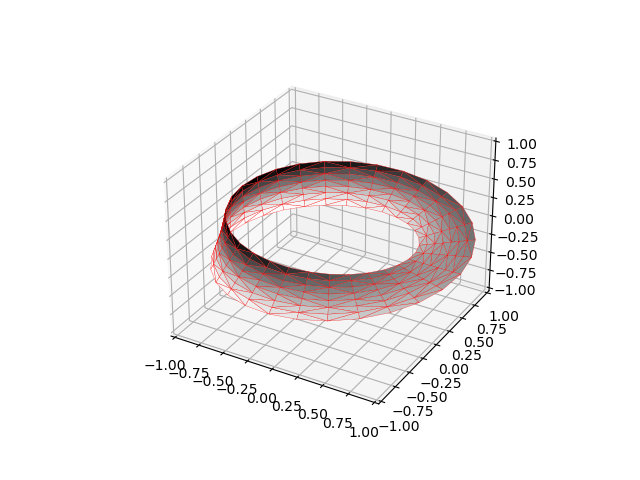

In [13]:
# triangulate in the underlying parametrization
from matplotlib.tri import Triangulation
tri = Triangulation(np.ravel(w), np.ravel(theta))

fig6  = plt.figure()
ax5 = plt.axes(projection='3d')
ax5.plot_trisurf(x, y, z, triangles=tri.triangles,
                cmap='Greys', linewidths=0.2, edgecolor='red')

ax5.set_xlim(-1, 1)
ax5.set_ylim(-1, 1)
ax5.set_zlim(-1, 1)

ax4.set_title('Möbius strip')
ax4.set_xlabel('x')
ax4.set_ylabel('y')
ax4.set_zlabel('z')
ax4.view_init(35,45)